****Movie Rating Prediction Task (Data Science Intern-CodSoft)****

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import dataset
df = pd.read_csv('/content/IMDb Movies India.csv', encoding = 'latin-1')

In [ ]:
#!pip install pandas_profiling


In [ ]:
# # Data Profiling
# import ydata_profiling as pandas_profiling

# # Generate a Pandas Profiling Report for initial data exploration
# report = pandas_profiling.ProfileReport(df)
# display(report)

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
print(df.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.keys()

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# Plot the number of movies released by year
year_count = df['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']

In [ ]:
import plotly.express as px
fig = px.bar(year_count, x='Year', y='Count', text='Count', title='Number of Movies Released by Year')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis=dict(title='Year of Movie Release', titlefont_size=16),
    yaxis=dict(title='Count of Movies Released', titlefont_size=16, tickfont_size=14),
)
fig.show()


In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
#df.dropna(subset=['Duration','Votes'], inplace=True)

In [ ]:
df.shape

(15509, 10)

In [ ]:
from sklearn.impute import SimpleImputer

# Handling missing values & Data Cleaning
# Convert 'Year' to numeric by extracting the numeric part and impute missing values with the median year
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)
df['Year'].fillna(df['Year'].mean(), inplace=True)

# Convert 'Duration' to numeric by removing 'min' and impute missing values with the median duration
df['Duration'] = df['Duration'].str.replace('min', '').astype(float)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

# Impute missing 'Genre' values with the most frequent genre
most_frequent_genre = df['Genre'].mode().iloc[0]
df['Genre'].fillna(most_frequent_genre, inplace=True)

# Impute missing 'Rating' values with the mean rating
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Remove non-numeric characters and convert 'Votes' to numeric, then impute missing values with the median votes
df['Votes'] = df['Votes'].str.replace('[^\d.]', '', regex=True).astype(float)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)

# Impute missing 'Director' values with the most frequent director
most_frequent_director = df['Director'].mode().iloc[0]
df['Director'].fillna(most_frequent_director, inplace=True)

# Impute missing 'Actor 1', 'Actor 2', 'Actor 3' values with "Unknown"
df[['Actor 1', 'Actor 2', 'Actor 3']] = df[['Actor 1', 'Actor 2', 'Actor 3']].fillna("Unknown")

# Explore data and perform initial analysis after handling missing values
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  float64
 2   Duration  15509 non-null  float64
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  float64
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB
None
               Year      Duration        Rating          Votes
count  15509.000000  15509.000000  15509.000000   15509.000000
mean    1987.012215    128.126519      5.841621    1938.276283
std       24.980261     19.753788      0.987343    8290.467955
min     1913.000000      2.000000      1.100000       5.000000
25%     1969.000000    128.126519      5.841621    

<ipython-input-194-08528256b3d1>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



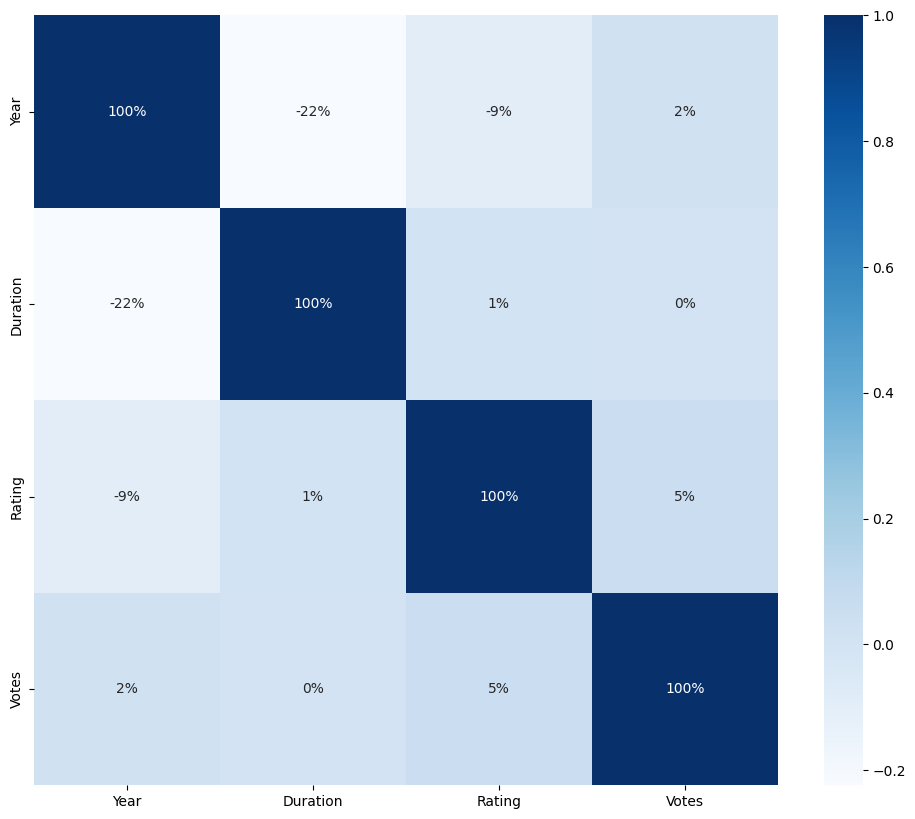

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap="Blues", fmt='.0%')
plt.show()

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1987.012215,128.126519,Drama,5.841621,1938.276283,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.000000,109.000000,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.000000,90.000000,"Drama, Musical",5.841621,1938.276283,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.000000,110.000000,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.000000,105.000000,Drama,5.841621,1938.276283,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Feature Engineering
# Example: Create a 'Total Actors' feature as the sum of top 3 actors
df['Total Actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].sum(axis=1)


In [ ]:
# Data Preprocessing
# Encode categorical features(Genre, Director, Actors)
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
categorical_cols = ['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3','Total Actors']


for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Total Actors
0,,67,87,299,5.841621,1938.276283,1926,2250,800,3108,6484
1,#Gadhvi (He thought he was Gandhi),99,67,299,7.000000,8.000000,1548,3280,4791,527,9618
2,#Homecoming,101,48,351,5.841621,1938.276283,5123,3713,2866,3450,10837
3,#Yaaram,99,68,228,4.400000,35.000000,3319,2917,1504,4020,8395
4,...And Once Again,90,63,299,5.841621,1938.276283,385,3112,3462,405,8937


In [ ]:
df.isnull().sum()

Name            0
Year            0
Duration        0
Genre           0
Rating          0
Votes           0
Director        0
Actor 1         0
Actor 2         0
Actor 3         0
Total Actors    0
dtype: int64

In [ ]:
  # Define features and target
features = ['Genre', 'Director','Votes','Year','Duration','Total Actors']
target = ['Rating']

X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'Mean Squared Error (MSE)': mse, 'Mean Absolute Error (MAE)': mae, 'R-squared (R2)': r2}

# Display results
for name, result in results.items():
    print(f'Model: {name}')
    print(f'MSE: {result["Mean Squared Error (MSE)"]}')
    print(f'MAE: {result["Mean Absolute Error (MAE)"]}')
    print(f'R-squared: {result["R-squared (R2)"]}')
    print()


<ipython-input-201-118fa9c5999b>:26: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model: Linear Regression
MSE: 0.9196643615165224
MAE: 0.6056184453985113
R-squared: 0.0444820970478228

Model: Random Forest Regression
MSE: 0.6446534153507354
MAE: 0.4221769444478613
R-squared: 0.33021447242867086

Model: Gradient Boosting Regression
MSE: 0.6622605223542831
MAE: 0.4799577632966009
R-squared: 0.3119209441969778

